In [7]:
import xarray as xr
import numpy as np
import os
import arrow
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# file_hdf = "H:/github/python/seafog/data/collection/ec201810-202205.hdf"
# file_hdf = "F:/github/pythonScript/seafog/data/collection/ec201810-202205.hdf"
file_hdf = "H:/github/python/seafog/data/collection/fullhour/fullhour.ec201810-202205.hdf"
store_hdf = pd.HDFStore(file_hdf, mode='r')
print(store_hdf.keys())

['/df_000', '/df_001', '/df_002', '/df_003', '/df_004', '/df_005', '/df_006', '/df_007', '/df_008', '/df_009', '/df_010', '/df_011', '/df_012', '/df_013', '/df_014', '/df_015', '/df_016', '/df_017', '/df_018', '/df_019', '/df_020', '/df_021', '/df_022', '/df_023', '/df_024', '/df_025', '/df_026', '/df_027', '/df_028', '/df_029', '/df_030', '/df_031', '/df_032', '/df_033', '/df_034', '/df_035', '/df_036', '/df_037', '/df_038', '/df_039', '/df_040', '/df_041', '/df_042', '/df_043', '/df_044', '/df_045', '/df_046', '/df_047', '/df_048', '/df_049', '/df_050', '/df_051', '/df_052', '/df_053', '/df_054', '/df_055', '/df_056', '/df_057', '/df_058', '/df_059', '/df_060', '/df_061', '/df_062', '/df_063', '/df_064', '/df_065', '/df_066', '/df_067', '/df_068', '/df_069', '/df_070', '/df_071', '/df_072', '/df_073', '/df_074', '/df_075', '/df_076', '/df_077', '/df_078', '/df_079', '/df_080', '/df_081', '/df_082', '/df_083', '/df_084', '/df_085', '/df_086', '/df_087', '/df_088', '/df_089', '/df_090'

In [3]:
fcHour_list = np.array(range(0, 240+1, 1))#list(range(0, 72+1, 3)) + list(range(78, 168+1, 6))
df_list = []
for iHour in fcHour_list:
    i_df = store_hdf.get(f'df_{iHour:0>3d}')
    df_list.append(i_df)


In [4]:
def linear_vis(x):
    if(x <= 1000.0):
      y = x/1000.0
    elif(x > 1000.0 and x <= 10000.0):
      y = (x-1000.0)/9000.0 + 1.0
    elif( x > 10000.0  and x <= 30000.0):
      y = (x-10000.0)/20000 + 2.0
    else:
      y = 3.0
    return y

In [5]:
df_all = pd.concat(df_list, ignore_index=True)


In [6]:
df_all['station_vis_linear'] = -1.0
df_all['station_vis_linear'] = df_all['station_vis'].apply(linear_vis)

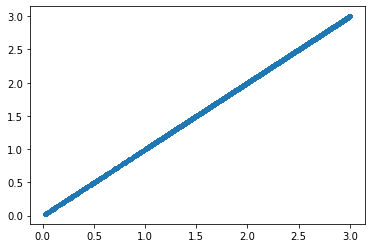

In [8]:

plt.plot(df_all['station_vis_linear'],df_all['station_vis_linear'],'.')
plt.show()

In [7]:
df_all.keys()

Index(['visi', 'v100', 'v10m', 'u100', 'u10m', 't2mm', 't2md', 'sstk',
       'vwnd1000', 'vwnd950', 'vwnd925', 'vwnd900', 'vwnd850', 'uwnd1000',
       'uwnd950', 'uwnd925', 'uwnd900', 'uwnd850', 'temp1000', 'temp950',
       'temp925', 'temp900', 'temp850', 'rhum1000', 'rhum950', 'rhum925',
       'rhum900', 'rhum850', 'theta_e1000', 'theta1000', 'theta_e950',
       'theta950', 'theta_e925', 'theta925', 'theta_e900', 'theta900',
       'theta_e850', 'theta850', 'actual_time', 'init_time', 'year', 'month',
       'day', 'hour', 'year_sin', 'year_cos', 'day_sin', 'day_cos',
       'station_vis', 'station_rain1', 'fc_hour', 'station_vis_cat',
       'station_vis_linear'],
      dtype='object')

In [9]:
df_fog = df_all.loc[df_all['station_vis_cat'] == 0]
df_mist =  df_all.loc[df_all['station_vis_cat'] == 1]
df_clear =  df_all.loc[df_all['station_vis_cat'] == 2]

In [10]:
print(len(df_fog))
print(len(df_mist))
print(len(df_clear))

5010
163614
431687


In [14]:
df_clear_sample = df_clear.sample(n=30000)
df_mist_sample = df_mist.sample(n=30000)
print(len(df_mist_sample))

30000


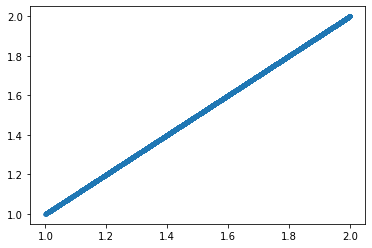

In [15]:
plt.plot(df_mist_sample['station_vis_linear'],df_mist_sample['station_vis_linear'],'.')
plt.show()

In [16]:
# train, valid, test的比例
# 合并 fog, mist, clear
# 随机打散
# train:valid : test = 6:1:2

partial_train = 6.0/9.0
partial_valid = 1.0/9.0
partial_test = 2.0/9.0

df_fog_train = df_fog[:int(len(df_fog)*partial_train)] # 训练集
df_fog_valid = df_fog[int(len(df_fog)*partial_train):int(len(df_fog)*partial_train)+int(len(df_fog)*partial_valid)] # 验证集
df_fog_test  = df_fog[int(len(df_fog)*partial_train)+int(len(df_fog)*partial_valid):] # 测试集

df_mist_train = df_mist_sample[:int(len(df_mist_sample)*partial_train)] # 训练集
df_mist_valid = df_mist_sample[int(len(df_mist_sample)*partial_train):int(len(df_mist_sample)*partial_train)+int(len(df_mist_sample)*partial_valid)] # 验证集
df_mist_test  = df_mist_sample[int(len(df_mist_sample)*partial_train)+int(len(df_mist_sample)*partial_valid):] # 测试集

df_clear_train = df_clear_sample[:int(len(df_clear_sample)*partial_train)] # 训练集
df_clear_valid = df_clear_sample[int(len(df_clear_sample)*partial_train) : int(len(df_clear_sample) * partial_train) + int(len(df_clear_sample)*partial_valid)] # 验证集
df_clear_test  = df_clear_sample[int(len(df_clear_sample)*partial_train) + int(len(df_clear_sample) * partial_valid) :] # 测试集


In [17]:
# 增加雾的数量
df_fog_train_extend = pd.concat([df_fog_train]*6, ignore_index=True)
df_fog_valid_extend = pd.concat([df_fog_valid]*6, ignore_index=True)

In [18]:
print(len(df_fog_train_extend))

20040


In [19]:
df_train = pd.concat([df_fog_train_extend, df_mist_train, df_clear_train], ignore_index=True)
df_valid = pd.concat([df_fog_valid_extend, df_mist_valid, df_clear_valid], ignore_index=True)
df_test = pd.concat([df_fog_test, df_mist_test, df_clear_test], ignore_index=True)

In [20]:
df_train = df_train.sample(frac=1)
df_valid = df_valid.sample(frac=1)
# df_test = df_test.sample(frac=1)


In [21]:
print(len(df_train))
print(len(df_valid))
print(len(df_test))

60040
10002
14448


In [23]:
# fog_dataset_hdf = "H:/github/python/seafog/data/collection/fog_dataset.hdf"
# fog_dataset_hdf = "F:/github/pythonScript/seafog/data/collection/extend/fog_dataset_extend_multilevels.hdf"
dirpath = 'H:/github/python/seafog/data/collection/fullhour/'
fog_dataset_hdf = f"{dirpath}fog_dataset_fulltime.hdf"
store_dataset = pd.HDFStore(fog_dataset_hdf, mode='w')

df_train.to_hdf(store_dataset, key=f'train', mode='a')
df_valid.to_hdf(store_dataset, key=f'valid', mode='a')
df_test.to_hdf( store_dataset, key=f'test' , mode='a')

df_train.to_csv(f'{dirpath}train_extend.csv')
df_valid.to_csv(f'{dirpath}valid_extend.csv')
df_test.to_csv(f'{dirpath}test.csv')
store_dataset.close()

In [ ]:
# 提取需要的变量组成x, 提取vis_cat作为y

In [13]:
x_columns = ['v100', 'v10m', 'u100', 'u10m', 't2mm', 't2md', 'sstk','year_sin','year_cos', 'day_sin', 'day_cos',]

df_train_x = df_train.loc[:, x_columns]
df_train_y = df_train['station_vis_cat']

df_valid_x = df_valid.loc[:, x_columns]
df_valid_y = df_valid['station_vis_cat']

df_test_x = df_test.loc[:, x_columns]
df_test_y = df_test['station_vis_cat']



In [14]:
train_x = df_train_x.to_numpy()
train_y = df_train_y.to_numpy()

valid_x = df_valid_x.to_numpy()
valid_y = df_valid_y.to_numpy()

test_x = df_test_x.to_numpy()
test_y = df_test_y.to_numpy()


In [15]:
print(train_x.shape)
print(train_y.shape)

(44751, 11)
(44751,)


In [12]:
df_train.to_numpy()

array([[4046.435546875, -3.0660858154296875, -2.6463775634765625, ...,
        0.0, 12, 2],
       [13515.86328125, 8.642013549804688, 5.7971038818359375, ..., 0.0,
        39, 2],
       [9900.552734375, -3.7729339599609375, -3.2535247802734375, ...,
        0.0, 24, 1],
       ...,
       [9310.4619140625, 4.059478759765625, 2.4014892578125, ..., 0.0,
        30, 1],
       [21499.46875, -3.150909423828125, -2.913055419921875, ..., 0.0,
        57, 1],
       [3296.634033203125, -0.6565093994140625, -0.273406982421875, ...,
        0.0, 45, 2]], dtype=object)